In [1]:
import pandas as pd

# Define the heads, relations, and tails
head = ['drugA', 'drugB', 'drugC', 'drugD', 'drugA', 'drugC', 'drugD', 'drugE', 'gene1', 'gene2','gene3', 'gene4', 'gene50', 'gene2', 'gene3', 'gene4']
relation = ['treats', 'treats', 'treats', 'treats', 'inhibits', 'inhibits', 'inhibits', 'inhibits', 'associated', 'associated', 'associated', 'associated', 'associated', 'interacts', 'interacts', 'interacts']
tail = ['fever', 'hepatitis', 'bleeding', 'pain', 'gene1', 'gene2', 'gene4', 'gene20', 'obesity', 'heart_attack', 'hepatitis', 'bleeding', 'cancer', 'gene1', 'gene20', 'gene50']

# Create a dataframe
df = pd.DataFrame({'head': head, 'relation': relation, 'tail': tail})
df

,head,relation,tail
0,drugA,treats,fever
1,drugB,treats,hepatitis
2,drugC,treats,bleeding
3,drugD,treats,pain
4,drugA,inhibits,gene1
5,drugC,inhibits,gene2
6,drugD,inhibits,gene4
7,drugE,inhibits,gene20
8,gene1,associated,obesity
9,gene2,associated,heart_attack


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a knowledge graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['head'], row['tail'], relation=row['relation'])


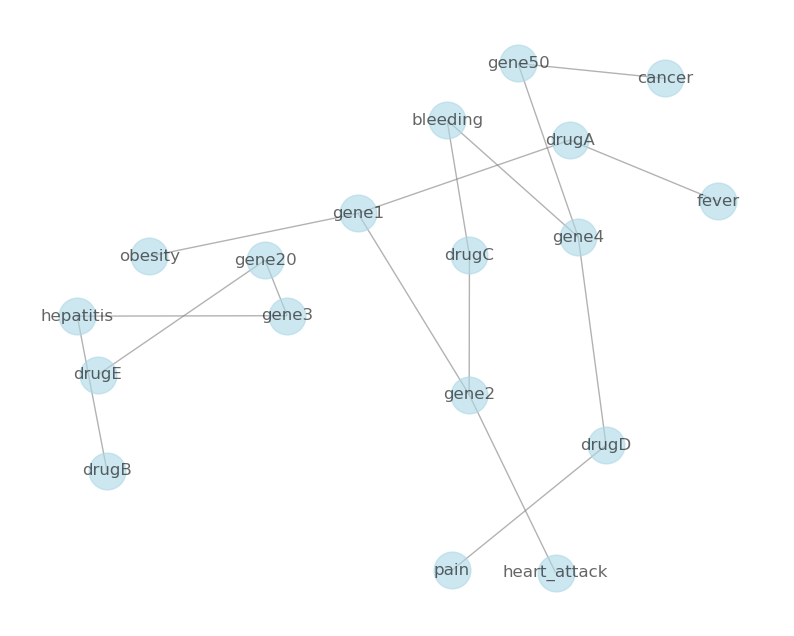

{}

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your graph
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')

fig, ax = plt.subplots(figsize=(10, 8))

nx.draw(G, pos, ax=ax, with_labels=True, font_size=12, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline', ax=ax)

plt.show()
labels


In [40]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

Number of nodes: 18
Number of edges: 16
Ratio edges to nodes: 0.89


In [25]:
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
    print(f'{node}: Degree Centrality = {centrality:.2f}')


IndentationError: expected an indented block after 'for' statement on line 2 (3269309054.py, line 3)

In [27]:
betweenness_centrality = nx.betweenness_centrality(G)
for node, centrality in betweenness_centrality.items():
    print(f'{node}: Betweenness Centrality = {centrality:.2f}')

drugA: Betweenness Centrality = 0.08
fever: Betweenness Centrality = 0.00
drugB: Betweenness Centrality = 0.00
hepatitis: Betweenness Centrality = 0.02
drugC: Betweenness Centrality = 0.26
bleeding: Betweenness Centrality = 0.26
drugD: Betweenness Centrality = 0.08
pain: Betweenness Centrality = 0.00
gene1: Betweenness Centrality = 0.21
gene2: Betweenness Centrality = 0.29
gene4: Betweenness Centrality = 0.26
drugE: Betweenness Centrality = 0.00
gene20: Betweenness Centrality = 0.02
obesity: Betweenness Centrality = 0.00
heart_attack: Betweenness Centrality = 0.00
gene3: Betweenness Centrality = 0.03
gene50: Betweenness Centrality = 0.08
cancer: Betweenness Centrality = 0.00


In [30]:
closeness_centrality = nx.closeness_centrality(G)
for node, centrality in closeness_centrality.items():
       print(f'{node}: closeness_centrality = {centrality:.2f}')

drugA: closeness_centrality = 0.18
fever: closeness_centrality = 0.15
drugB: closeness_centrality = 0.09
hepatitis: closeness_centrality = 0.13
drugC: closeness_centrality = 0.26
bleeding: closeness_centrality = 0.26
drugD: closeness_centrality = 0.19
pain: closeness_centrality = 0.15
gene1: closeness_centrality = 0.22
gene2: closeness_centrality = 0.26
gene4: closeness_centrality = 0.24
drugE: closeness_centrality = 0.09
gene20: closeness_centrality = 0.13
obesity: closeness_centrality = 0.17
heart_attack: closeness_centrality = 0.19
gene3: closeness_centrality = 0.16
gene50: closeness_centrality = 0.19
cancer: closeness_centrality = 0.15


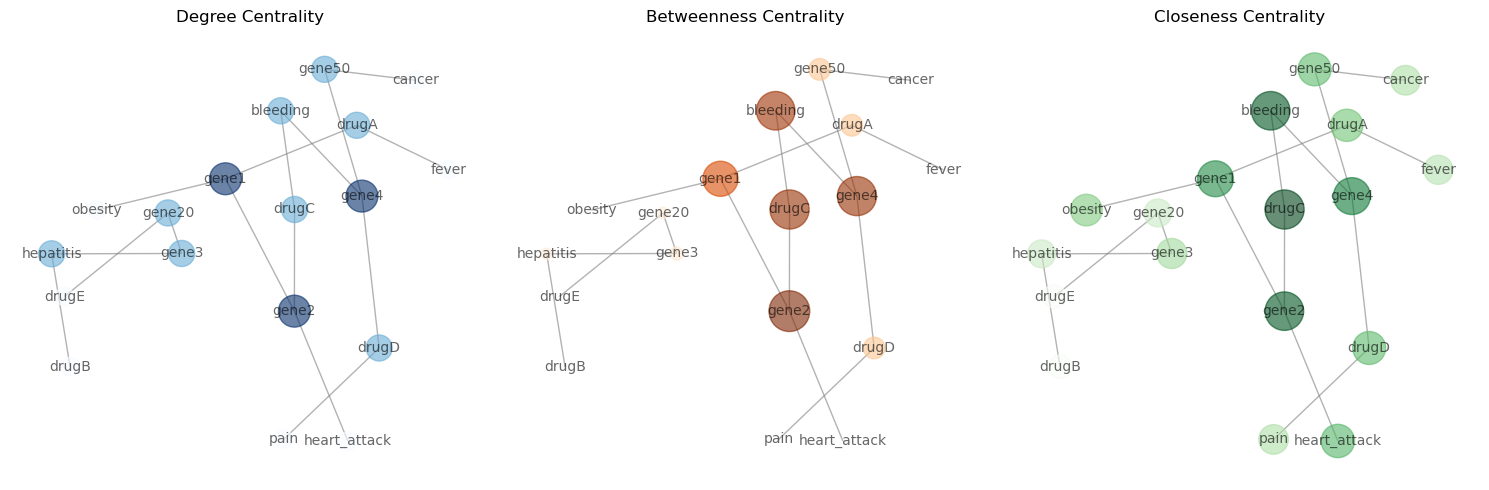

In [34]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualize centrality measures
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Degree centrality
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in degree_centrality.values()], node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color='gray', alpha=0.6, ax=axs[0])
axs[0].set_title('Degree Centrality')

# Betweenness centrality
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in betweenness_centrality.values()], node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6, ax=axs[1])
axs[1].set_title('Betweenness Centrality')

# Closeness centrality
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in closeness_centrality.values()], node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color='gray', alpha=0.6, ax=axs[2])
axs[2].set_title('Closeness Centrality')

plt.tight_layout()
plt.show()



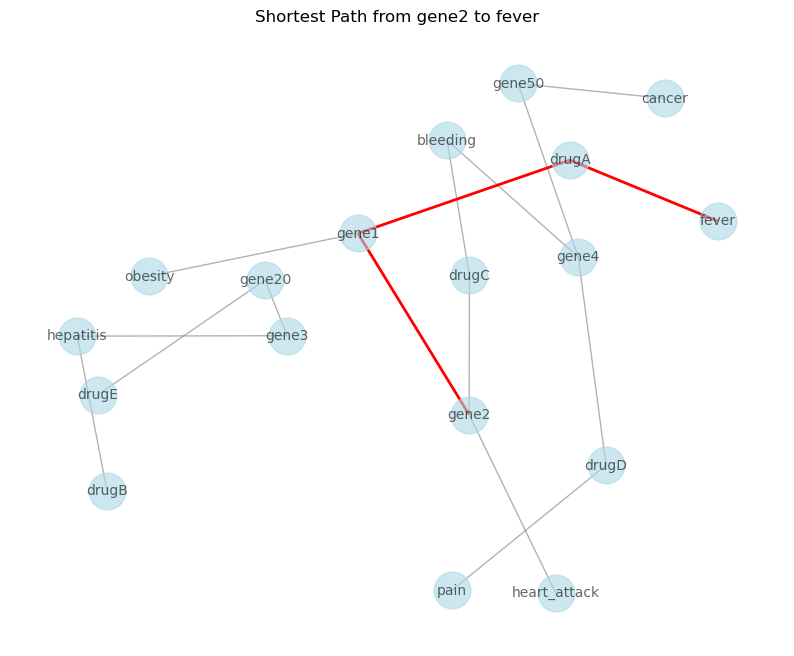

Shortest Path: ['gene2', 'gene1', 'drugA', 'fever']


In [60]:
source_node = 'gene2'
target_node = 'fever'

# Find the shortest path
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)

# Visualize the shortest path
plt.figure(figsize=(10, 8))
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

# Get the current axes
ax = plt.gca()

nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, ax=ax)
plt.title(f'Shortest Path from {source_node} to {target_node}')
plt.show()

print('Shortest Path:', shortest_path)


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

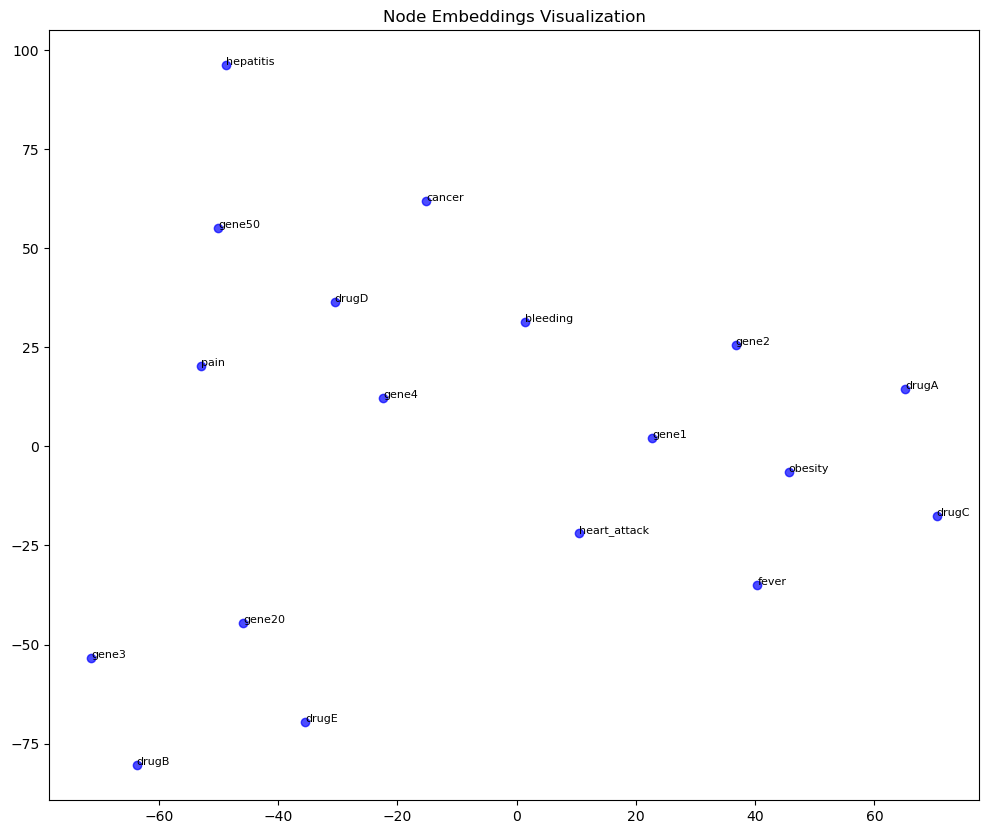

In [48]:
!pip install node2vec
from node2vec import Node2Vec

# Generate node embeddings using node2vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4) # You can adjust these parameters
model = node2vec.fit(window=10, min_count=1, batch_words=4) # Training the model

# Visualize node embeddings using t-SNE
from sklearn.manifold import TSNE
import numpy as np

# Get embeddings for all nodes
embeddings = np.array([model.wv[node] for node in G.nodes()])

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=10, n_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

# Add node labels
for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('Node Embeddings Visualization')
plt.show()



C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


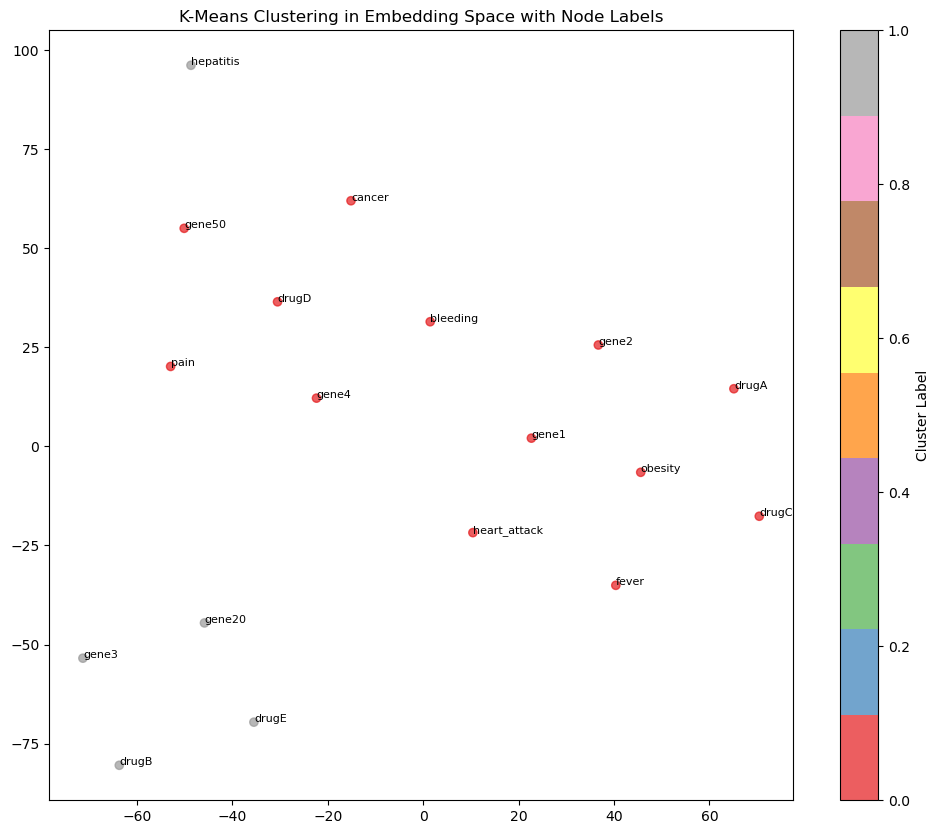

In [61]:
from sklearn.cluster import KMeans

# Perform K-Means clustering on node embeddings
num_clusters = 2 # Adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Visualize K-Means clustering in the embedding space with node labels
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=plt.cm.Set1, alpha=0.7)

for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('K-Means Clustering in Embedding Space with Node Labels')
plt.colorbar(label= "Cluster Label")
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


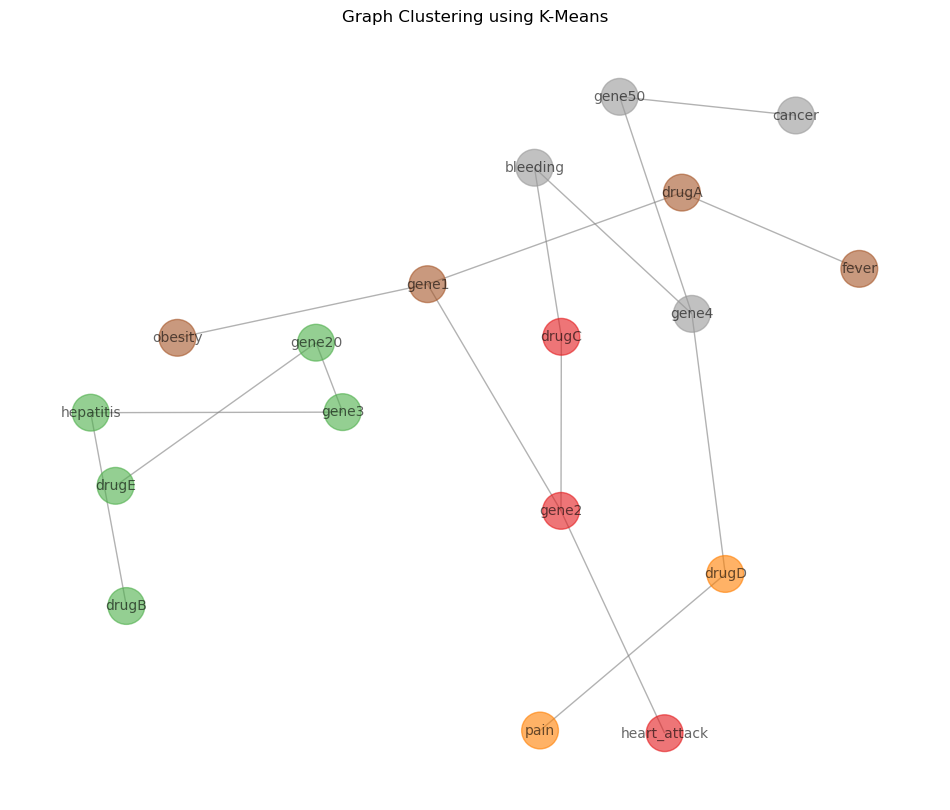

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means clustering on node embeddings
num_clusters = 5 # Adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Visualize clusters
nx.draw(G, pos, ax=ax, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)

plt.title('Graph Clustering using K-Means')
plt.show()


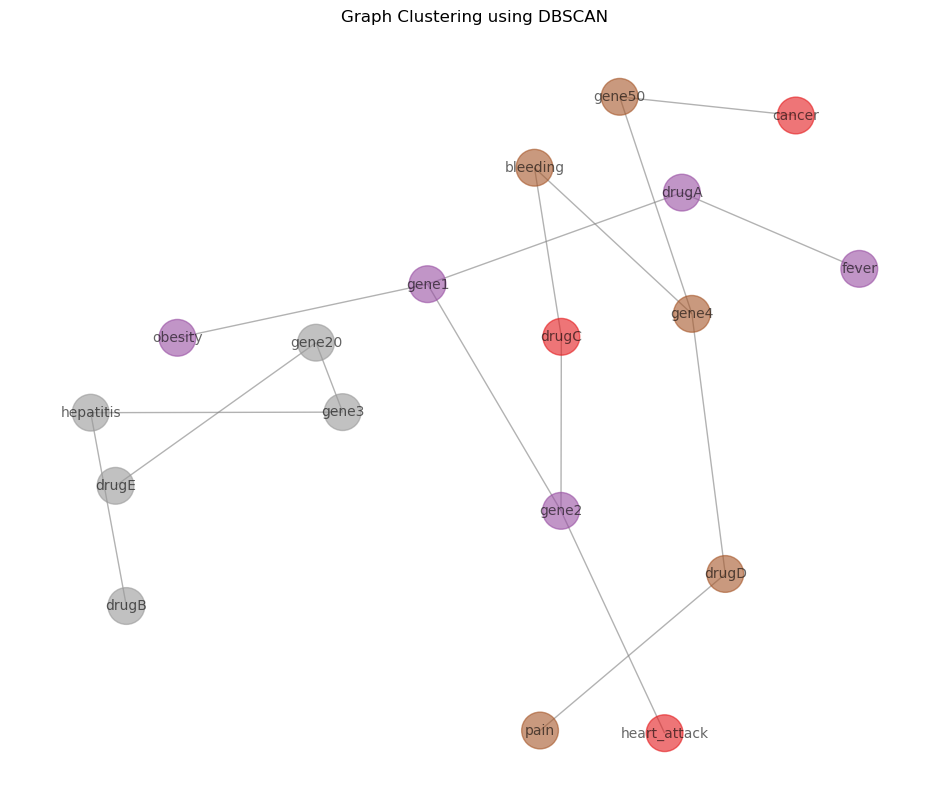

In [70]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Perform DBSCAN clustering on node embeddings
dbscan = DBSCAN(eps=1.0, min_samples=5) # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(embeddings)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Visualize clusters
nx.draw(G, pos, ax=ax, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using DBSCAN')
plt.show()
